In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

art = pd.read_csv("data/articles_processed.csv")                 # 상품 메타데이터
cust = pd.read_csv("data/customer_processed.csv")               # 고객 메타데이터
total_revenue = pd.read_csv("data/total_revenue.csv")       # 매출 데이터

In [32]:
# # ---------------------------------------------------------------------
# 분석용 통합 테이블 거래+고객+상품
# 볼수 있는 데이터
# ==  거래(매출, 채널, 날짜, 고객그룹) + 고객속성 + 상품속성
# 가입한 사람이 아닌 소비한 고객을 골라야 하기 때문에 inner 사용
# ---------------------------------------------------------------------

analysis_master = (
    total_revenue
    .merge(cust, on="Customer_Id", how="inner")
    .merge(art, on="Article_Id", how="inner")
)
analysis_master.shape

(804149, 27)

In [33]:
pd.set_option('display.max_columns', None)
analysis_master.head()

,T_Dat,Customer_Id,Article_Id,Revenue,Sales_Channel_Id,Month,Year_Month,Month_Day,Total_Revenue,Revenue_Group,Fn,Active,Club_Member_Status,Fashion_News_Frequency,Age,Age_Group,Product_Code,Prod_Name,Product_Type_Info,Product_Group_Name,Graphical_Appearance_Info,Perceived_Colour_Master_Info,Department_Info,Index_Info,Index_Group_Info,Section_Info,Garment_Group_Info
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,11,2019-11,11-05,0.227186,top_20,True,True,Active,Regularly,51,50s,698328,ZEBRA CF TVP,Sweater (252),Garment Upper body,Placement print (1010014),Blue (2),Tops Fancy Jersey (1640),Divided (D),Divided (2),Divided Collection (53),Jersey Fancy (1005)
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,5,2019-05,05-22,0.067746,middle,False,False,Active,NaN,28,20s,760597,BUBBLE WRAP TOP,Top (254),Garment Upper body,Stripe (1010017),White (9),Jersey (1660),Ladieswear (A),Ladieswear (1),Womens Casual (6),Jersey Fancy (1005)
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,5,2019-05,05-10,0.016932,bottom_20,True,True,Active,Regularly,37,30s,488561,Teddy jogger.,Shorts (274),Garment Lower body,Chambray (1010024),Blue (2),Shorts (5658),Menswear (F),Menswear (3),Contemporary Casual (21),Shorts (1025)
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,8,2019-08,08-26,0.033881,middle,False,False,Active,NaN,19,10s,682771,Yuki shopper,Bag (66),Accessories,Solid (1010016),Black (5),Bags (3209),Ladies Accessories (C),Ladieswear (1),Womens Big accessories (65),Accessories (1019)
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,8,2019-08,08-10,0.028627,middle,False,False,Active,NaN,35,30s,742400,1pk Sportsock,Socks (302),Socks & Tights,All over pattern (1010001),White (9),Socks Wall (5999),Menswear (F),Menswear (3),Men Underwear (26),Socks and Tights (1021)


### 주요 사용 컬럼
- Customer_Id
- Sales_Channel_Id
- Age
- Age_Group
- Product_Type_Info

## 시각화

In [34]:
df = analysis_master.copy()

In [35]:
df['Sales_Channel_Id'] = df['Sales_Channel_Id'].replace({1: '오프라인', 2: '온라인'})
df['Age_Group'] = df['Age_Group'].replace({'10s': '10대', '20s': '20대', '30s': '30대', '40s': '40대', '50s': '50대', '60s+': '60대+'})

### 채널별 판매량 비교

In [36]:
channel_cnt = df.groupby('Sales_Channel_Id').size().reset_index(name='Purchase_Cnt')

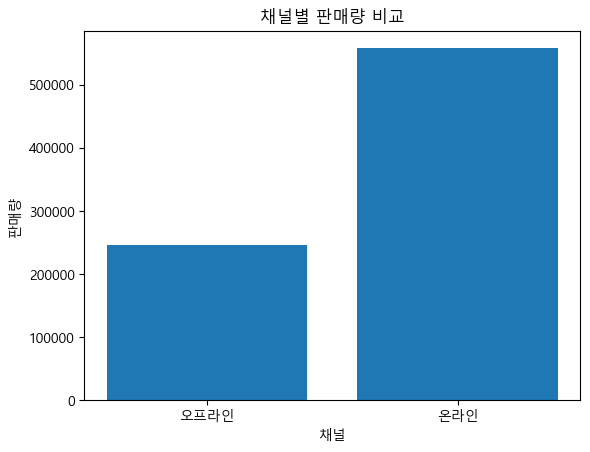

In [38]:
plt.bar(channel_cnt['Sales_Channel_Id'], channel_cnt["Purchase_Cnt"])
plt.title("채널별 판매량 비교")
plt.xlabel("채널")
plt.ylabel("판매량")
plt.show()

### 연령대별 판매량 비교

In [39]:
age_cnt = df.groupby('Age_Group').size().reset_index(name='Purchase_Cnt')

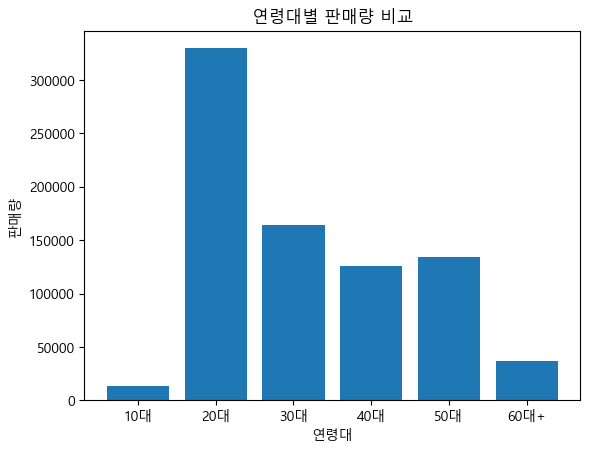

In [40]:
plt.bar(age_cnt['Age_Group'], age_cnt["Purchase_Cnt"])
plt.title("연령대별 판매량 비교")
plt.xlabel("연령대")
plt.ylabel("판매량")
plt.show()

### 채널 - 연령대 판매량

In [41]:
age_channel_cnt = df.groupby(['Age_Group', 'Sales_Channel_Id']).size().reset_index(name='Purchase_Cnt')

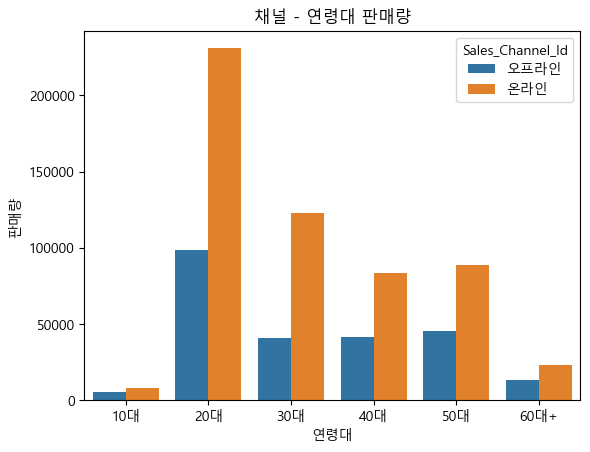

In [42]:
sns.barplot(data=age_channel_cnt, x='Age_Group', y='Purchase_Cnt', hue='Sales_Channel_Id')

plt.title("채널 - 연령대 판매량")
plt.xlabel("연령대")
plt.ylabel("판매량")
plt.show()

### 상품군별 판매량 TOP 10

In [44]:
product_cnt = df.groupby('Product_Type_Info').size().reset_index(name='Purchase_Cnt').sort_values('Purchase_Cnt', ascending=False).head(10)
product_cnt

,Product_Type_Info,Purchase_Cnt
97,Trousers (272),105465
25,Dress (265),80749
87,Sweater (252),70385
92,T-shirt (255),56036
95,Top (254),41753
9,Blouse (258),40494
107,Vest top (253),37281
76,Shorts (274),32993
13,Bra (306),31788
89,Swimwear bottom (59),30166


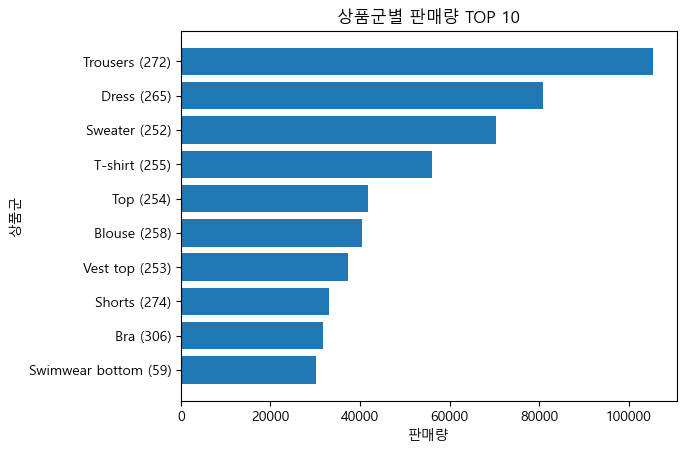

In [45]:
plt.barh(product_cnt['Product_Type_Info'], product_cnt['Purchase_Cnt'])
plt.gca().invert_yaxis()

plt.title("상품군별 판매량 TOP 10")
plt.xlabel("판매량")
plt.ylabel("상품군")
plt.show()

### 상품군 - 연령대 판매량

In [46]:
product_age_cnt = df.groupby(['Product_Type_Info', 'Age_Group']).size().reset_index(name='Purchase_Cnt')

In [47]:
top_products = product_cnt['Product_Type_Info'].tolist()

# 판매량 TOP 10 상품군만 필터링
product_age_cnt_top = product_age_cnt[product_age_cnt['Product_Type_Info'].isin(top_products)]

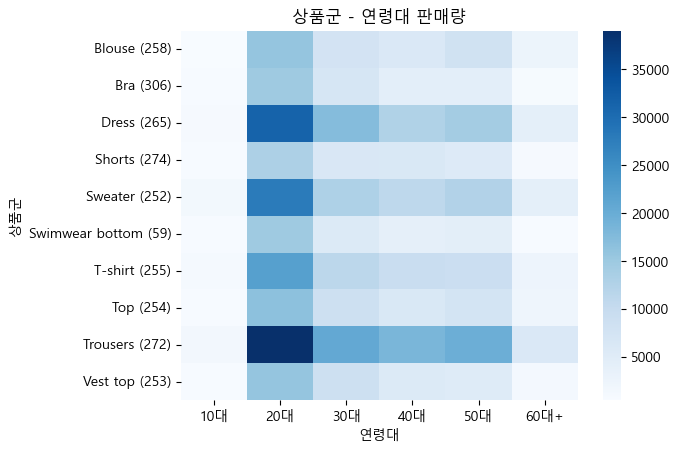

In [48]:
pivot_1 = product_age_cnt_top.pivot(index='Product_Type_Info', columns='Age_Group', values='Purchase_Cnt')

sns.heatmap(pivot_1, cmap="Blues")
plt.title("상품군 - 연령대 판매량")
plt.xlabel("연령대")
plt.ylabel("상품군")
plt.show()


### 연령대별 1인당 평균 구매 건수

In [49]:
age_customer_cnt = df.groupby('Age_Group')['Customer_Id'].nunique()
age_purchase_cnt = df.groupby('Age_Group').size()

age_frequency = (age_purchase_cnt / age_customer_cnt).reset_index()
age_frequency.columns = ['Age_Group', 'Avg_Purchase_Per_Customer']

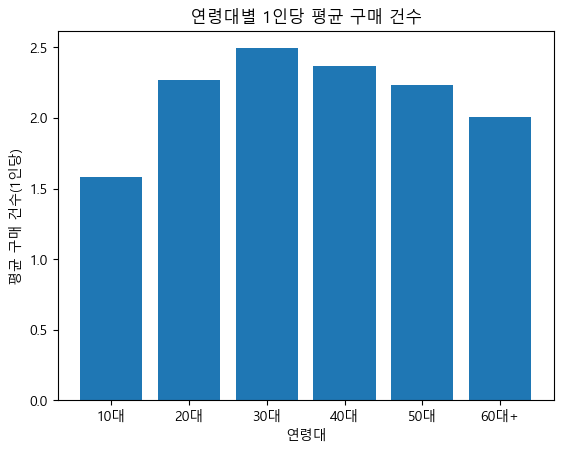

In [53]:
plt.bar(age_frequency['Age_Group'], age_frequency['Avg_Purchase_Per_Customer'])

plt.title("연령대별 1인당 평균 구매 건수")
plt.xlabel("연령대")
plt.ylabel("평균 구매 건수(1인당)")
plt.show()


### 연령대별 구매 고객 수

In [54]:
age_customer_cnt = df.groupby('Age_Group')['Customer_Id'].nunique().reset_index(name='Customer_Count')

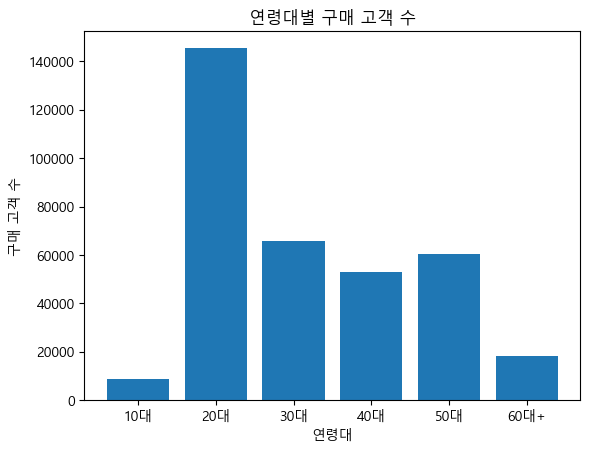

In [55]:
plt.bar(age_customer_cnt['Age_Group'], age_customer_cnt['Customer_Count'])

plt.title("연령대별 구매 고객 수")
plt.xlabel("연령대")
plt.ylabel("구매 고객 수")
plt.show()